In [11]:
from keras.datasets import imdb
print("Imported Dataset")
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Imported Dataset


In [25]:
# decode a movie review from integer value to english words
word_index = imdb.get_word_index()
reverse_word_index = dict(
            [(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join(
            [reverse_word_index.get(i-3,'?') for i in train_data[0]])
print("Decoded Reviews")
print(decoded_review)

Decoded Reviews
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have do

In [44]:
# Encode integer sequences into a binary matrix

def vectorize_sequences(sequences,dimension=10000):
    
    results = np.zeros((len(sequences),dimension)) 
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("one-hot encoding complete.. aka train and test data is vectorized")

one-hot encoding complete.. aka train and test data is vectorized


In [45]:
from keras import models
from keras import layers

# Model Definition

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


# Compiling the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# setting aside validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training Model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                   ) # validation_data=(x_val, y_val))


W0810 18:59:23.898140 139684990388032 deprecation_wrapper.py:119] From /home/zain/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/20
15000/15000 [==============================] - 4s 294us/step - loss: 0.4988 - acc: 0.7827
Epoch 2/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.2907 - acc: 0.9037 0s - loss: 0.2986 - acc:
Epoch 3/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2144 - acc: 0.9291
Epoch 4/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1694 - acc: 0.9446
Epoch 5/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1380 - acc: 0.9561
Epoch 6/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1142 - acc: 0.9649
Epoch 7/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0933 - acc: 0.9719
Epoch 8/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.0822 - acc: 0.9755
Epoch 9/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.0631 - acc: 0.9830
Epoch 10/20
15000/15000 [==============================] - 2s 149u

dict_keys(['loss', 'acc'])


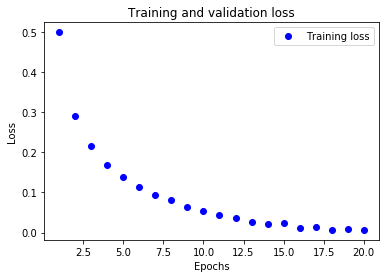

In [50]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss

history_dict   = history.history
print(history_dict.keys())
loss_value     = history_dict['loss']
# val_loss_value = history_dict['val_loss']

epochs         = range(1,len(history_dict['acc']) + 1)
plt.plot(epochs, loss_value, 'bo', label='Training loss')
# plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# restore np.load for future normal usage
np.load = np_load_old